# RuleTree for clustering

## Initialize the RuleTreeCluster and train it on your dataset

In [1]:
from ruletree.tree.RuleTreeCluster import RuleTreeCluster
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data                # Features
y = data.target              # Target labels
feature_names = data.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [2]:
# Initialize the RuleTreeCluster
# The `prune_useless_leaves` parameter allows pruning of leaves with the same prediction outcome.
# The 'bic_eps' parameters regulates the bayesian information criterion used for splitting. 
rtclu = RuleTreeCluster(
    max_depth=3, 
    criterion='squared_error', 
    bic_eps=0.2, 
    prune_useless_leaves=True, 
    random_state=42
)

# Fit the RuleTreeClassifier to the training data
rtclu.fit(X_train, y_train)

# Extract the rules as a dictionary using feature names
rules = rtclu.get_rules(columns_names=feature_names)


In [3]:
# Print textual rules of trained tree
rtclu.print_rules(rules, columns_names=feature_names)

|--- mean concave points <= 0.059	398
|   |--- worst perimeter <= 97.665	269
|   |   |--- worst perimeter <= 76.405	192
|   |   |    output: 4
|   |   |--- worst perimeter > 76.405
|   |   |    output: 2
|   |--- worst perimeter > 97.665
|   |   |--- mean area <= 857.85	77
|   |   |    output: 7
|   |   |--- mean area > 857.85
|   |   |    output: 0
|--- mean concave points > 0.059
|   |--- mean concavity <= 0.198	129
|   |   |--- smoothness error <= 0.008	90
|   |   |    output: 3
|   |   |--- smoothness error > 0.008
|   |   |    output: 6
|   |--- mean concavity > 0.198
|   |   |--- worst area <= 1338.0	39
|   |   |    output: 1
|   |   |--- worst area > 1338.0
|   |   |    output: 5


In [4]:
y_pred = rtclu.predict(X_test)
print('Prediction results\n', y_pred[0:10])

Prediction results
 [2 3 3 2 2 5 5 3 3 7]


In [5]:
# Obtain global feature importances similar to sklearn feature_importances_ of a trained Tree
feture_importances = rtclu.compute_feature_importances()
feture_importances

array([0.        , 0.        , 0.        , 0.05004601, 0.        ,
       0.        , 0.07146214, 0.5292868 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03551766,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27448806, 0.03919933, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

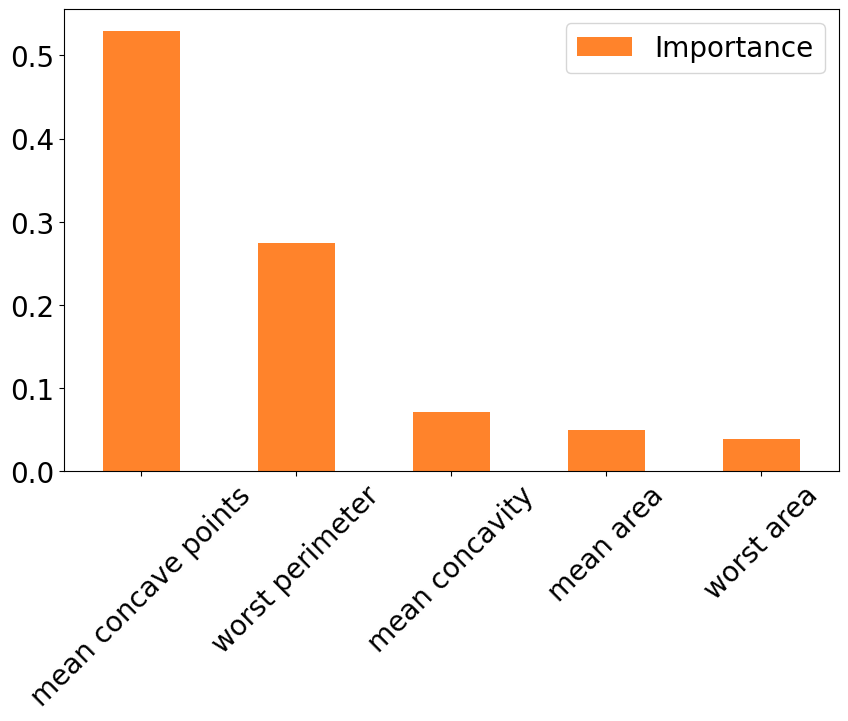

In [6]:
feat_importances = pd.DataFrame(feture_importances, index=feature_names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.head(5).plot(kind='bar', figsize=(10,6), color = '#ff832b')
plt.xticks(fontsize=20, rotation = 45)
plt.yticks(fontsize=20)                       
plt.legend(fontsize=20)  
plt.show()